# Image Classification!

## Imports

In [1]:
import numpy as np
import os
# from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

## Grabbing Class labels.

In [8]:
test_labels=np.load("test_labels.npz")['args']

In [9]:
train_labels=np.load("train_labels.npz")['args']

In [10]:
clusted_images_test=np.load("clusted_images_test.npz")['args']

In [11]:
clusted_images_train=np.load("clusted_images_train.npz")['args']

In [4]:
def graph_before_and_after(data_pre, data_after, Image_num):
    fig, ax = plt.subplots(1,2,figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(data_pre[Image_num].astype(int))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(data_after[Image_num])
    ax[1].set_title('16-color Image', size=16);

In [12]:
def graph_one(data, Image_num):
    fig, ax = plt.subplots(figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax.imshow(data[Image_num])
    ax.set_title('16-color Image', size=16);

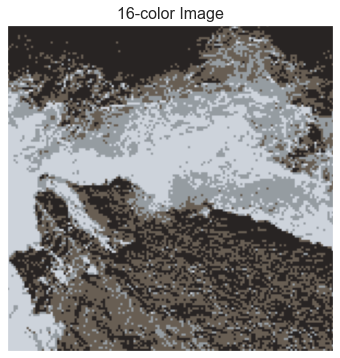

In [13]:
graph_one(clusted_images_train, 10000)

## Warren's Baseline Model code

In [14]:
from tensorflow.keras import models, layers

In [30]:
model_bl = models.Sequential()

In [31]:
model_bl.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150, 150, 3)))
model_bl.add(layers.MaxPooling2D(2,2))
model_bl.add(layers.Flatten())
model_bl.add(layers.Dense(128,activation='relu'))
model_bl.add(layers.Dense(6,activation='softmax'))

In [35]:
model_bl.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [37]:
history_bl = model_bl.fit(clusted_images_train,train_labels,
                    batch_size=16,
                    epochs=10,
                    validation_data=(clusted_images_test,test_labels),
                    )

Epoch 1/10
878/878 [==============================] - 538s 612ms/step - loss: 1.1511 - acc: 0.5475 - val_loss: 1.0474 - val_acc: 0.5983
Epoch 2/10
878/878 [==============================] - 457s 521ms/step - loss: 0.7782 - acc: 0.7152 - val_loss: 0.9062 - val_acc: 0.6530
Epoch 3/10
878/878 [==============================] - 464s 529ms/step - loss: 0.4853 - acc: 0.8329 - val_loss: 0.9023 - val_acc: 0.6920
Epoch 4/10
878/878 [==============================] - 460s 524ms/step - loss: 0.2579 - acc: 0.9190 - val_loss: 1.1220 - val_acc: 0.6773
Epoch 5/10
878/878 [==============================] - 455s 518ms/step - loss: 0.1502 - acc: 0.9560 - val_loss: 1.1921 - val_acc: 0.6843
Epoch 6/10
878/878 [==============================] - 441s 503ms/step - loss: 0.1058 - acc: 0.9702 - val_loss: 1.3628 - val_acc: 0.6723
Epoch 7/10
878/878 [==============================] - 430s 490ms/step - loss: 0.0818 - acc: 0.9773 - val_loss: 1.5400 - val_acc: 0.6623
Epoch 8/10
878/878 [============================

In [38]:
history_bl.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [22]:
def history_graph(history, save_title):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 8))
    metrics_loss = ['loss','val_loss']
    for metric_loss in metrics_loss:
        ax1.plot(history.history[metric_loss], label=metric_loss)
        ax1.legend()
        ax1.set_title(f"Model's Loss per Epoch")
    metrics_acc = ['acc','val_acc']
    for metric_acc in metrics_acc:
        ax2.plot(history.history[metric_acc], label=metric_acc)
        ax2.legend()
        ax2.set_title(f"Model's Accuracy per Epoch")
    plt.tight_layout()
    fig.savefig(f'{save_title}.png', dpi=300)

In [23]:
history_graph(history_bl, Baseline_Model)

NameError: name 'history_bl' is not defined

Terrible over fitting, going to Regularize next.

### Regularization Model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
model_L2Reg = models.Sequential()

In [18]:
model_L2Reg.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150, 150, 3), kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
model_L2Reg.add(layers.MaxPooling2D(2,2))
model_L2Reg.add(layers.Flatten())
model_L2Reg.add(layers.Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
model_L2Reg.add(layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
model_L2Reg.add(layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
model_L2Reg.add(layers.Dense(6,activation='softmax'))

In [19]:
model_L2Reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
#added checkpoints
checkpoint = tf.keras.callbacks.ModelCheckpoint("Regularization_model.h5", save_best_only=True)

In [20]:
history_L2Reg = model_L2Reg.fit(clusted_images_train,train_labels,
                    batch_size=16,
                    epochs=15,
                    validation_data=(clusted_images_test,test_labels))

Epoch 1/15
878/878 [==============================] - 645s 735ms/step - loss: 2.0010 - acc: 0.4969 - val_loss: 1.5403 - val_acc: 0.5730
Epoch 2/15
878/878 [==============================] - 636s 724ms/step - loss: 1.4855 - acc: 0.5771 - val_loss: 1.7811 - val_acc: 0.4770
Epoch 3/15
878/878 [==============================] - 633s 721ms/step - loss: 1.3819 - acc: 0.6029 - val_loss: 1.2992 - val_acc: 0.6217
Epoch 4/15
878/878 [==============================] - 636s 724ms/step - loss: 1.3269 - acc: 0.6119 - val_loss: 1.2722 - val_acc: 0.6170
Epoch 5/15
878/878 [==============================] - 803s 915ms/step - loss: 1.2735 - acc: 0.6189 - val_loss: 1.2812 - val_acc: 0.6127
Epoch 6/15
878/878 [==============================] - 897s 1s/step - loss: 1.2490 - acc: 0.6286 - val_loss: 1.2392 - val_acc: 0.6143
Epoch 7/15
878/878 [==============================] - 729s 831ms/step - loss: 1.2294 - acc: 0.6355 - val_loss: 1.4523 - val_acc: 0.5530
Epoch 8/15
878/878 [==============================]

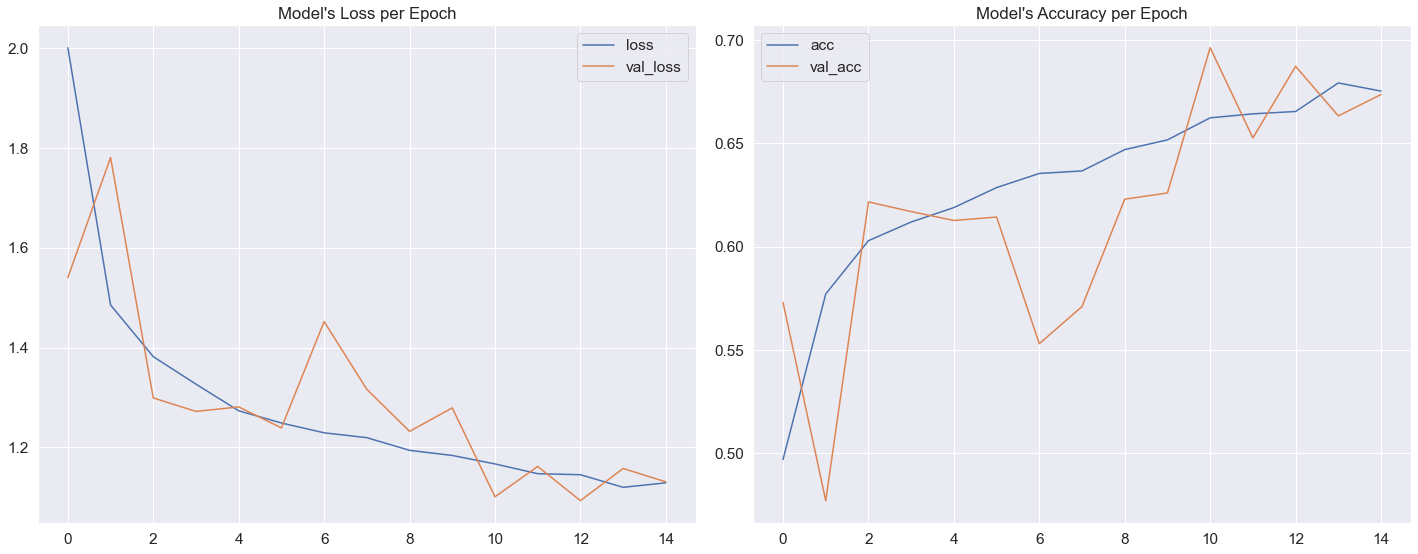

In [25]:
history_graph(history_L2Reg, "L2_Regularization_Model")